In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "ecommerce_customer_behavior_dataset.csv"
df = pd.read_csv(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

Level 1: Basic Insights

In [4]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode().iloc[0]

print(f"Mean Age={mean_age}, Median age={median_age}, Mode age = {mode_age}")

Mean Age=43.7899, Median age=44.0, Mode age = 51


In [5]:
purchase_amount = df['Purchase Amount ($)']
variance_purchase = purchase_amount.var()
std_dev_purchase = purchase_amount.std()
z_score_purchase = stats.zscore(purchase_amount)

print(f"Variance of Purchase Amount is {variance_purchase}")
print(f"Standard deviation of Purchase Amount is {std_dev_purchase}")
print(f"Z-Score of Purchase Amount is: {z_score_purchase}")

Variance of Purchase Amount is 81932.24073019298
Standard deviation of Purchase Amount is 286.23808399685913
Z-Score of Purchase Amount is: [-1.05285627  0.531219    1.60628694 ...  1.10500083 -1.63841211
 -0.94486385]


In [6]:
top_three_categories = df['Product Category'].value_counts().head(3)
print(f"Top 3 Product Catagories based on the number of purchase is {top_three_categories}")

Top 3 Product Catagories based on the number of purchase is Product Category
Electronics    1309
Clothing       1297
Toys           1288
Name: count, dtype: int64


In [7]:
num_return_coustomer = df['Return Customer'].sum()
print(f"Number of Return Coustomers is : {num_return_coustomer}")

Number of Return Coustomers is : 4996


In [8]:
avg_review_score = df['Review Score (1-5)'].mean()
print(f"Average review given by Coustomers: {round(avg_review_score,4)}")

Average review given by Coustomers: 2.9951


In [9]:
avg_delivery_by_subscription = df[df['Subscription Status'].isin(['Free', 'Premium'])].groupby('Subscription Status')['Delivery Time (days)'].mean()
    
difference = max(avg_delivery_by_subscription['Free'],avg_delivery_by_subscription['Premium'])-min(avg_delivery_by_subscription['Free'],avg_delivery_by_subscription['Premium'])
print(f"The average delivery times vary between subscription statuses(Free, Premium) by {difference} days.")

The average delivery times vary between subscription statuses(Free, Premium) by 0.1064236108345531 days.


In [10]:
subscribed_customer = df[df['Subscription Status']== 'Premium'].value_counts().shape[0]

print(f"The total subscribed customer are {subscribed_customer}")

The total subscribed customer are 3369


Mobile Users: 33.74%
Desktop Users: 33.48%
Tablet Users: 32.78%


<Axes: title={'center': 'Device Usage Percentage'}, xlabel='Device Type', ylabel='Percentage (%)'>

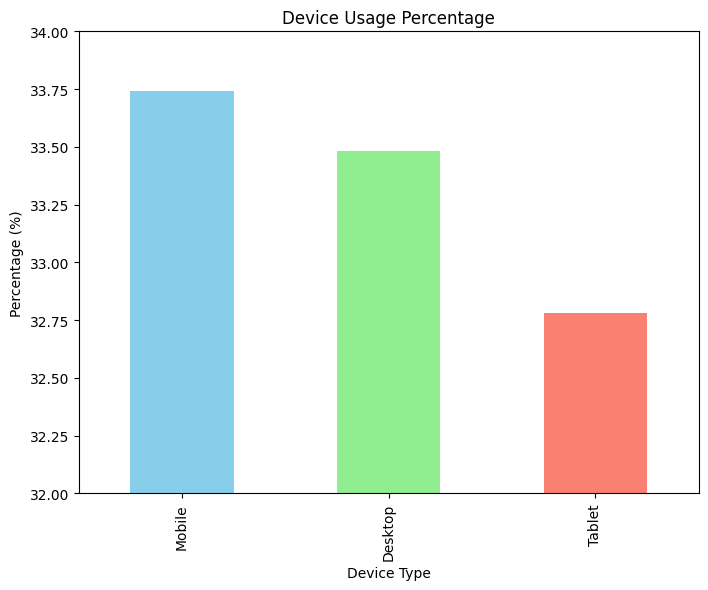

In [60]:
device_percentages = df['Device Type'].value_counts(normalize=True) * 100
print(f"Mobile Users: {round(device_percentages['Mobile'],3)}%")
print(f"Desktop Users: {round(device_percentages['Desktop'],3)}%")
print(f"Tablet Users: {round(device_percentages['Tablet'],3)}%")
device_percentages.plot(
    kind='bar',
    title='Device Usage Percentage',
    ylabel='Percentage (%)',
    xlabel='Device Type',
    color=['skyblue', 'lightgreen', 'salmon', 'green', 'red', 'yellow'],
    grid=False,
    ylim=(32,34),
    figsize=(8, 6)
)

In [12]:
avg_purchase_discount = df.groupby('Discount Availed')['Purchase Amount ($)'].mean()
avg_purchase_discount_availed = avg_purchase_discount[True]

print(f"The average purchase amount for customers who availed discount compared to who didn't is {round(avg_purchase_discount_availed,3)}")

The average purchase amount for customers who availed discount compared to who didn't is 505.264


The most used payment method is 'Bank Transfer' and it is used 2067 times.


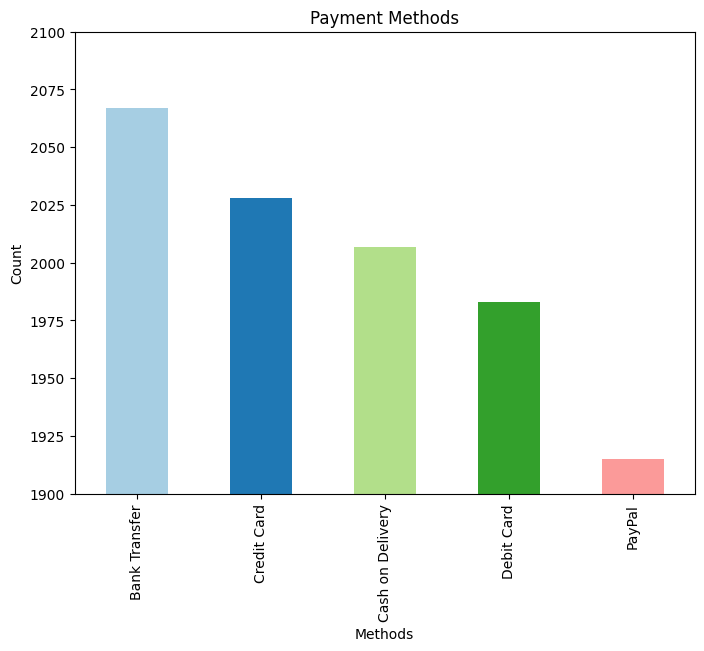

In [63]:


most_common_payment_method = df['Payment Method'].mode().iloc[0]
usage_count = df['Payment Method'].value_counts().loc[most_common_payment_method]
payment_methods = df['Payment Method'].value_counts()


colors = plt.cm.Paired.colors[:len(payment_methods)] 

payment_methods.plot(
    kind='bar',
    title='Payment Methods',
    ylabel='Count',
    xlabel='Methods',
    color=colors,
    grid=False,
    ylim=(1900,2100),
    figsize=(8, 6)
)

# plt.tight_layout()
# plt.show()

print(f"The most used payment method is '{most_common_payment_method}' and it is used {usage_count} times.")


Level 2 Insights

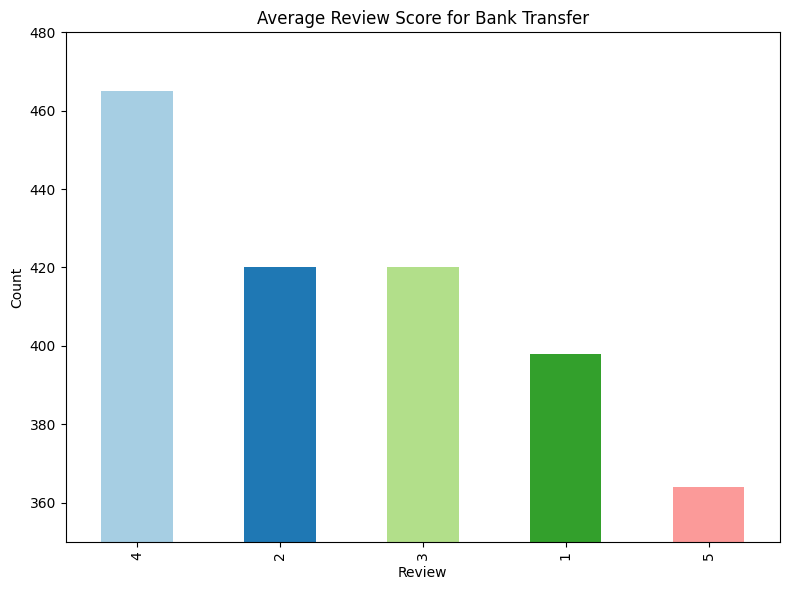

The average review scores of user of the most common payment method Bank Transfer is 2.99


In [68]:
most_common_payment_users = df[df['Payment Method']==most_common_payment_method]
avg_review_most_common_payment = most_common_payment_users['Review Score (1-5)']
avg_review_score = avg_review_most_common_payment.mean()
colors = plt.cm.Paired.colors[:len(avg_review_most_common_payment.value_counts())] 
avg_review_most_common_payment.value_counts().plot(
    kind='bar',
    title=f'Average Review Score for {most_common_payment_method}',
    ylabel='Count',
    xlabel='Review',
    grid=False,
    color = colors,
    ylim = (350,480),
    figsize=(8, 6)
)
plt.tight_layout()
plt.show()

print(f"The average review scores of user of the most common payment method {most_common_payment_method} is {round(avg_review_score,2)}")

In [66]:
avg_review_most_common_payment.value_counts()

Review Score (1-5)
4    465
2    420
3    420
1    398
5    364
Name: count, dtype: int64

In [15]:
correlation_time_purchase = df['Time Spent on Website (min)'].corr(df['Purchase Amount ($)'])
correlation_time_items = df['Time Spent on Website (min)'].corr(df['Number of Items Purchased'])
print(f"The correlation between time spend on the website and the purchase amount is: {correlation_time_purchase}")
print(f"The correlation between time spend on the website and the purchase item is: {correlation_time_items}")

The correlation between time spend on the website and the purchase amount is: 0.010024809958752734
The correlation between time spend on the website and the purchase item is: 0.00014797204544230743


Here We can see that the correlation between the time spend on the website and the purchase item is so low. So we can say that the customers who spend more time on the website doesn't buy more items.

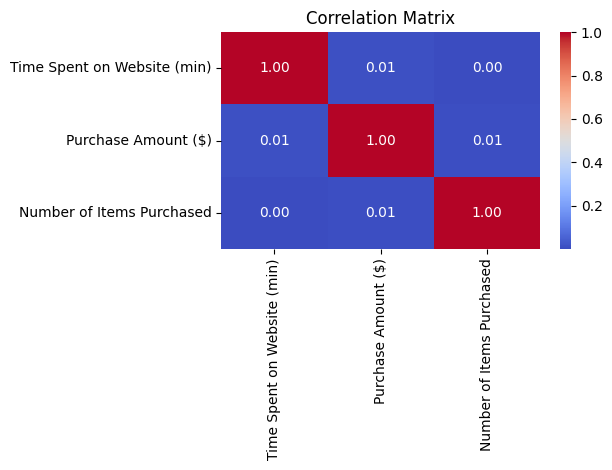

In [16]:
correlation_matrix = df[['Time Spent on Website (min)', 'Purchase Amount ($)', 'Number of Items Purchased']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
satisfied_customers = df['Review Score (1-5)'] >= 4
return_customer = df['Return Customer'] == True
satisfied_and_return_customers = df[satisfied_customers & return_customer].shape[0]
total_customers = df.shape[0]
satisfied_and_return_customers_percentage = (satisfied_and_return_customers / total_customers) * 100
print(f"Percentage of satisfied and return customer is {round(satisfied_and_return_customers_percentage,3)} %")

Percentage of satisfied and return customer is 20.08 %


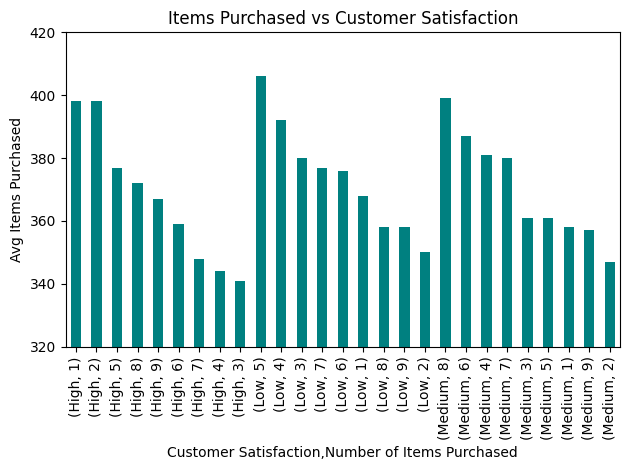

In [69]:
satisfaction_order = ['Low', 'Medium', 'High']
avg_items = df.groupby('Customer Satisfaction')['Number of Items Purchased'].value_counts()
avg_items.plot(kind='bar', color='teal')
plt.title('Items Purchased vs Customer Satisfaction')
plt.ylabel('Avg Items Purchased')
plt.tight_layout()
plt.ylim(320,420),
plt.show()

In [19]:
items_vs_satisfictaion = df.groupby('Customer Satisfaction')['Number of Items Purchased'].mean()
items_vs_satisfictaion

Customer Satisfaction
High      4.947639
Low       4.988707
Medium    5.058841
Name: Number of Items Purchased, dtype: float64

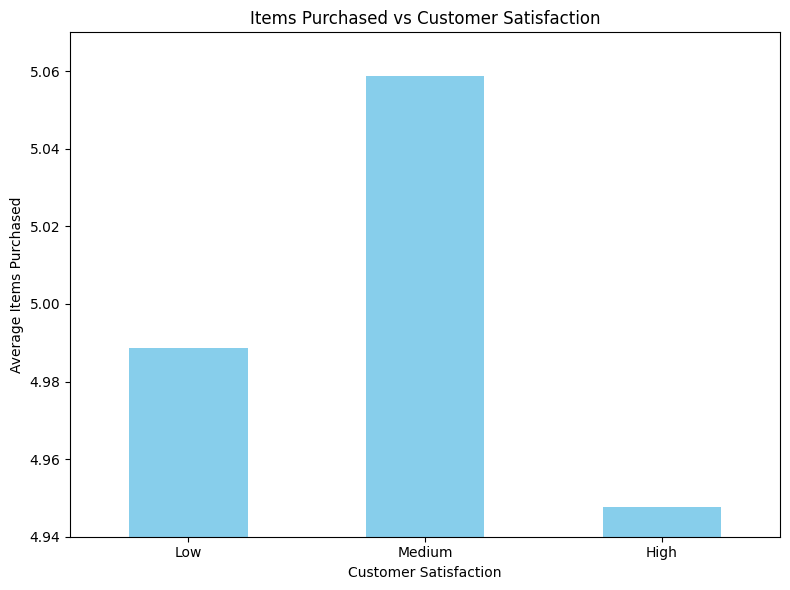

In [20]:


items_vs_satisfaction = df.groupby('Customer Satisfaction')['Number of Items Purchased'].mean()
items_vs_satisfaction = items_vs_satisfaction.reindex(['Low', 'Medium', 'High'])


ax = items_vs_satisfaction.plot(
    kind='bar',
    color='skyblue',
    figsize=(8, 6),
    title='Items Purchased vs Customer Satisfaction'
)



plt.xlabel('Customer Satisfaction')
plt.ylabel('Average Items Purchased')
plt.ylim(4.94, 5.07)  
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


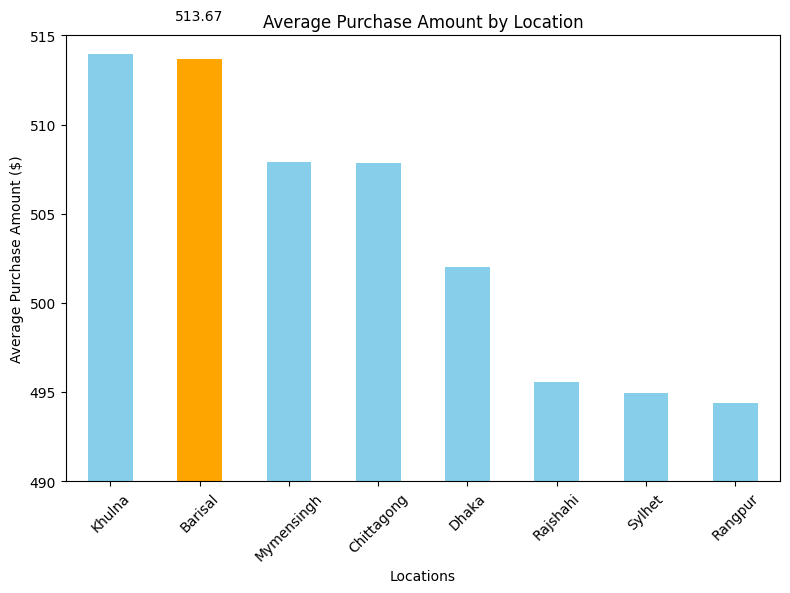

Barisal has the second highest average purchase amount and it is 513.6745599999999


In [72]:
location_wise_purchase = df.groupby('Location')['Purchase Amount ($)'].mean().sort_values(ascending=False)


second_highest_location_name = location_wise_purchase.index[1]
second_highest_location_value = location_wise_purchase.iloc[1]


ax = location_wise_purchase.plot(
    kind='bar',
    title='Average Purchase Amount by Location',
    ylabel='Average Purchase Amount ($)',
    xlabel='Locations',
    figsize=(8, 6),
    color='skyblue'
)


ax.patches[1].set_facecolor('orange')
ax.text(1, second_highest_location_value + 2, f'{second_highest_location_value:.2f}',
        ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(490,515)
plt.show()

print(f"{second_highest_location_name} has the second highest average purchase amount and it is {second_highest_location_value}")

Level 3 Insights

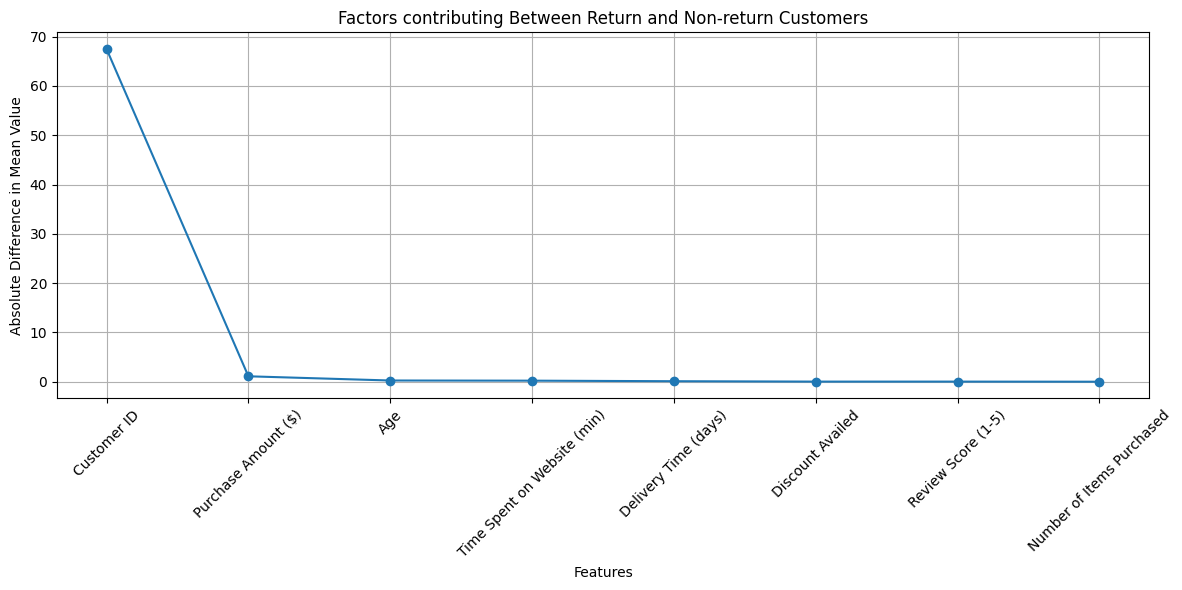

In [44]:
return_groups = df.groupby('Return Customer')
contributing_factors = return_groups.mean(numeric_only=True).T


contributing_factors['Difference'] = abs(contributing_factors[True] - contributing_factors[False])


contributing_factors_sorted = contributing_factors.sort_values(by='Difference', ascending=False)


contributing_factors_sorted['Difference'].plot(
    kind='line',
    marker='o',
    title='Factors contributing Between Return and Non-return Customers',
    figsize=(12, 6),
    grid=True
)

plt.ylabel('Absolute Difference in Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
contributing_factors

Return Customer,False,True,Difference
Customer ID,5034.225220,4966.720777,67.504443
Purchase Amount ($),503.342292,504.443577,1.101285
Age,43.913669,43.665933,0.247736
Time Spent on Website (min),30.025180,29.811449,0.213731
Delivery Time (days),6.961231,7.064852,0.103621
Discount Availed,0.489209,0.514211,0.025003
Review Score (1-5),2.982814,3.007406,0.024592
Number of Items Purchased,4.996403,5.000600,0.004198


In [45]:
df.groupby('Payment Method')['Customer Satisfaction'].value_counts(normalize=True).unstack().fillna(0)

Customer Satisfaction,High,Low,Medium
Payment Method,,,
Bank Transfer,0.339623,0.328012,0.332366
Cash on Delivery,0.312407,0.350274,0.337319
Credit Card,0.346647,0.343688,0.309665
Debit Card,0.336863,0.334846,0.328290
PayPal,0.315405,0.325326,0.359269


<Axes: title={'center': 'Relation between the customer satisfaction and return rates'}, xlabel='Payment Method', ylabel='Return Rate'>

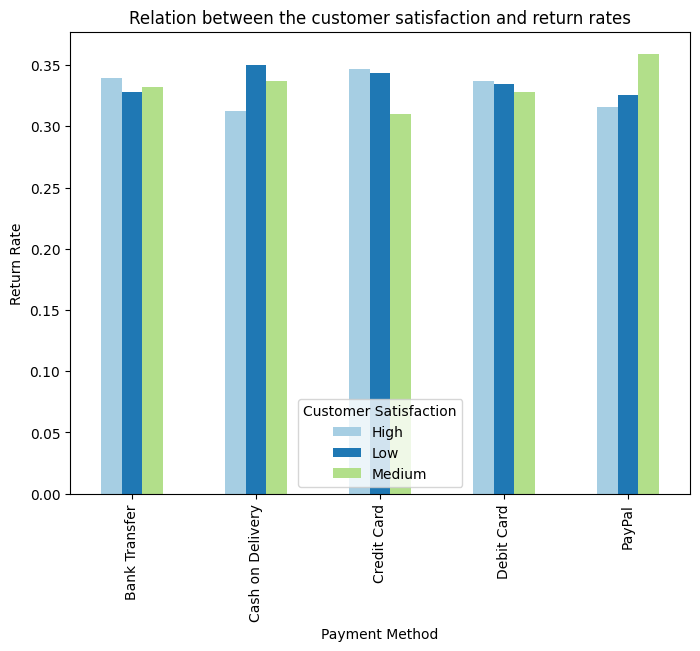

In [47]:
df.groupby('Payment Method')['Customer Satisfaction'].value_counts(normalize=True).unstack().fillna(0).plot(
    kind='bar',
    title=f'Relation between the customer satisfaction and return rates',
    ylabel='Return Rate',
    xlabel='Payment Method',
    grid=False,
    color = colors,
    figsize=(8, 6)
)

In [50]:
location_influence = df.groupby('Location')[['Purchase Amount ($)', 'Delivery Time (days)']].mean().sort_values(by='Purchase Amount ($)', ascending=False)
location_influence

,Purchase Amount ($),Delivery Time (days)
Location,,
Khulna,513.937072,6.811774
Barisal,513.674560,7.072800
Mymensingh,507.892211,7.099219
Chittagong,507.851675,7.020440
Dhaka,502.002504,6.941957
Rajshahi,495.544649,7.113130
Sylhet,494.976427,7.018593
Rangpur,494.368867,7.031125


<Axes: title={'center': 'Location wise purchase'}, xlabel='Location', ylabel='Purchase Amount'>

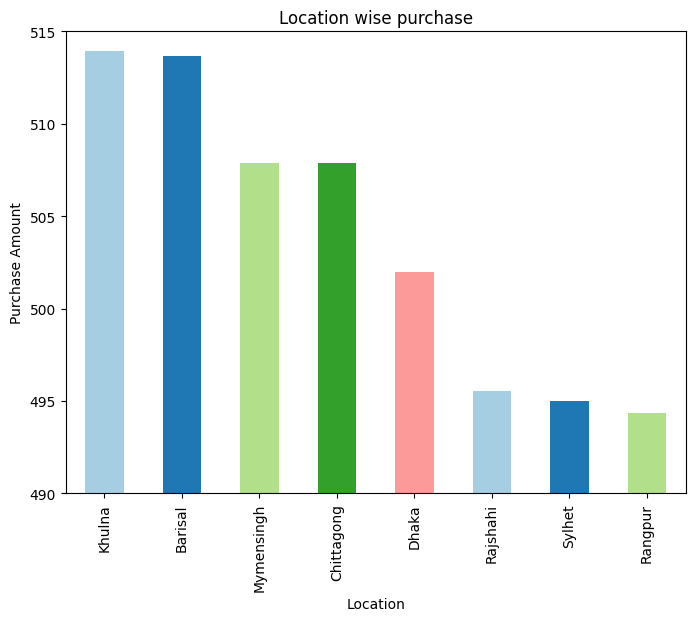

In [54]:
location_influence['Purchase Amount ($)'].plot(
    kind='bar',
    title=f'Location wise purchase',
    ylabel='Purchase Amount',
    xlabel='Location',
    grid=False,
    color = colors,
    figsize=(8, 6),
    ylim=(490,515)
)

<Axes: title={'center': 'Location wise Delivery Time'}, xlabel='Location', ylabel='Delivery Time (Days)'>

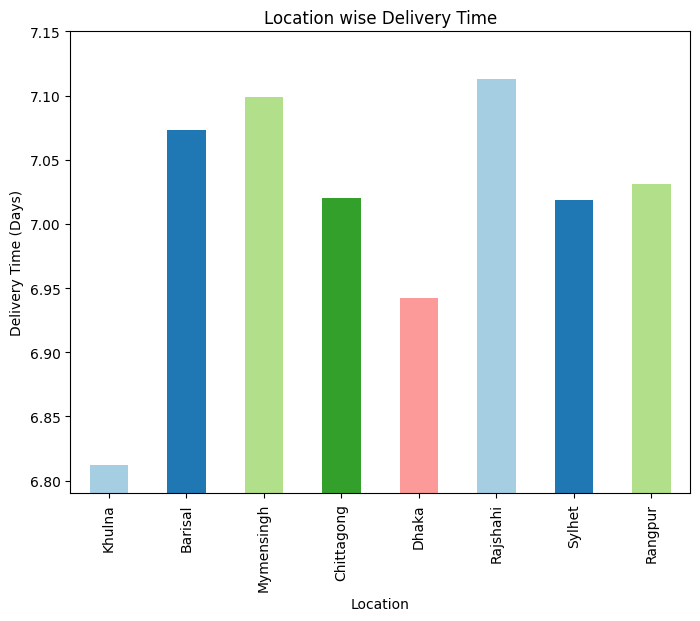

In [59]:
location_influence['Delivery Time (days)'].plot(
    kind='bar',
    title=f'Location wise Delivery Time',
    ylabel='Delivery Time (Days)',
    xlabel='Location',
    grid=False,
    color = colors,
    figsize=(8, 6),
    ylim=(6.79,7.15)
    
)

## Major Insights – Summary & Explanation

1. **Return Customers Are Driven by Discounts, Reviews, and Subscription**  
   - Return customers tend to **use discounts more often**, give **higher review scores**.  
   - These customers also show slightly **higher satisfaction**, suggesting loyalty is tied to perceived value and experience.

2. **Bank Transfer Users Are More Loyal**  
   - **Bank Transfer** users have the **highest return rate** (51%) and one of the highest satisfaction scores.  
   - Businesses should **encourage credit card usage** through promotions or loyalty rewards.

3. **Location Matters for Sales Strategy**  
   - **Khulna** and **Barisal** customers have the **highest average purchase amounts** (over $513), indicating strong market potential.  
   - Delivery time remains consistent (~7 days), so **logistics are not a bottleneck**, even in high-value regions.

4. **Time Spent on the Website Has No Real Effect**  
   - Correlations between time spent and purchase amount or item count are nearly **zero**.  
   - Customers seem to make quick, purposeful purchases — focus more on **recommendation systems** than on session duration.

5. **Satisfaction Distribution Is Fairly Balanced**  
   - Customers across all satisfaction levels purchase a **similar number of items** (~5).  
   - This implies that item quantity alone is not a driver of satisfaction — **other factors like delivery, quality, and payment experience matter more**.
"""